In [172]:
# Import libraries section

import chart_studio
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as ply
import psycopg2
import seaborn as sns
import spotipy
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from spotipy.oauth2 import SpotifyClientCredentials
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [36]:
client_credentials_manager = SpotifyClientCredentials(client_id='64c7e99146a749da88cbad6d9b55183c', client_secret='48bb5ebd778f4223a2b0cdd3e9a3a66d')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [38]:
conn = psycopg2.connect("dbname='phmcuozt' user='phmcuozt' host='drona.db.elephantsql.com' password='Hl4xzpVOZxiQ9af4kH5bavoEHIx7z3hn'")
songs = pd.read_sql_query('SELECT * FROM spotify_table', conn, index_col='index')
conn.close()

In [99]:
chart_studio.tools.set_credentials_file(username='CodingDuckmx', api_key='BJDTaHirN1qxM6uaTXhS')

In [59]:
# songs = songs.drop(labels='Unnamed: 0', axis=1)
print(songs.shape)
songs.head()

(58223, 17)


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
index,,,,,,,,,,,,,,,,,
0,Miley Cyrus,Party In The U.S.A.,5Q0Nhxo0l2bP3pNjpGJwV1,74,0.427838,0.328196,1.333185,0.758164,-1.489051,-0.463995,-0.913554,-0.380443,-0.637529,-0.144799,-0.784931,202067,0.224847
1,Kid Cudi,Day 'N' Nite (nightmare),5FEXPoPnzueFJQCPRIrC3c,74,1.661430,-0.749092,1.614584,0.438619,-1.489051,-0.126802,0.708911,-0.380894,-0.483960,1.134665,0.569331,221267,0.224847
2,Owl City,Fireflies,3DamFFqW32WihKkTVlwTYQ,80,-0.355127,0.173701,-0.636603,0.327596,0.671569,-0.445207,-0.827914,-0.380911,-0.459776,-0.179800,1.928369,228347,0.224847
3,Cage The Elephant,Ain't No Rest for the Wicked,3Pzh926pXggbMe2ZpXyMV7,74,0.326447,0.958702,-1.480798,0.272085,0.671569,0.158971,-0.774471,-0.380911,1.021494,1.601339,1.150333,175493,0.224847
4,Kid Cudi,Pursuit Of Happiness (Nightmare),5iSEsR6NKjlC9SrIJkyL3k,72,0.303915,-0.060129,-1.480798,-0.106605,0.671569,-0.469928,0.660030,-0.380533,0.628504,-0.938145,-0.163664,295293,0.224847


In [63]:
songs = songs.drop_duplicates(['track_id'])
songs.shape

(58223, 17)

In [280]:

numerical_features = ['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence']

scaled_data = scale(songs[numerical_features])

songs[numerical_features] = scaled_data


In [286]:
features = ['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence','popularity']
songs[features] = songs[features].astype(float)
songs_features = songs[features].astype(float)
songs_features.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
index,,,,,,,,,,,,,
0,-0.913554,0.427838,0.328196,-0.380443,1.333185,-0.637529,0.758164,-1.489051,-0.463995,-0.784931,0.224847,-0.144799,74.0
1,0.708911,1.661430,-0.749092,-0.380894,1.614584,-0.483960,0.438619,-1.489051,-0.126802,0.569331,0.224847,1.134665,74.0
2,-0.827914,-0.355127,0.173701,-0.380911,-0.636603,-0.459776,0.327596,0.671569,-0.445207,1.928369,0.224847,-0.179800,80.0
3,-0.774471,0.326447,0.958702,-0.380911,-1.480798,1.021494,0.272085,0.671569,0.158971,1.150333,0.224847,1.601339,74.0
4,0.660030,0.303915,-0.060129,-0.380533,-1.480798,0.628504,-0.106605,0.671569,-0.469928,-0.163664,0.224847,-0.938145,72.0


In [287]:
#  Product of the vectors.

knn = Sequential()
knn.add(Dense(input_shape=(songs_features.shape[1],),
       units=songs.shape[0],
       activation='linear',
       use_bias=False))

knn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 58223)             756899    
Total params: 756,899
Trainable params: 756,899
Non-trainable params: 0
_________________________________________________________________


In [288]:
# Normalize the vectors

def normalize(vectors):
    
    norm_vectors = np.linalg.norm(vectors, axis=1, keepdims=True)
    return (vectors / norm_vectors)

In [289]:
norm_songs_features = normalize(songs_features)
norm_songs_features.head()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
index,,,,,,,,,,,,,
0,-0.012337,0.005778,0.004432,-0.005138,0.018004,-0.008610,0.010239,-0.020109,-0.006266,-0.010600,0.003036,-0.001955,0.999348
1,0.009570,0.022429,-0.010113,-0.005142,0.021797,-0.006534,0.005921,-0.020102,-0.001712,0.007686,0.003035,0.015318,0.999006
2,-0.010344,-0.004437,0.002170,-0.004759,-0.007954,-0.005744,0.004093,0.008391,-0.005562,0.024093,0.002809,-0.002246,0.999519
3,-0.010457,0.004408,0.012944,-0.005143,-0.019993,0.013792,0.003674,0.009067,0.002146,0.015532,0.003036,0.021621,0.999134
4,0.009163,0.004219,-0.000835,-0.005283,-0.020557,0.008725,-0.001480,0.009323,-0.006524,-0.002272,0.003121,-0.013024,0.999527


In [290]:
# change the weights to the original matrix of features (of songs).

knn.set_weights([np.array(norm_songs_features.T)])
knn.get_weights()

[array([[-0.01233728,  0.00957036, -0.01034395, ..., -0.02851753,
          0.04059322, -0.03506643],
        [ 0.00577782,  0.02242945, -0.00443695, ..., -0.03646544,
          0.01114359, -0.04163326],
        [ 0.00443219, -0.0101128 ,  0.00217022, ...,  0.04802181,
         -0.05612413,  0.0336684 ],
        ...,
        [ 0.00303649,  0.00303545,  0.00280923, ...,  0.00699651,
         -0.08764107,  0.00860873],
        [-0.00195547,  0.01531808, -0.00224642, ..., -0.00958819,
         -0.02544815, -0.01030865],
        [ 0.99934787,  0.9990064 ,  0.999519  , ...,  0.99573743,
          0.99006927,  0.9954646 ]], dtype=float32)]

In [291]:
# Prediction time

random_choice = np.random.randint(1,songs.shape[0]+1)

sample_song = songs.loc[random_choice]
print('Artist:', sample_song[2])
print('Song name:', sample_song[1])

Artist: 1C8QGWHQeHOCte0bB1dCHk
Song name: Amen


In [47]:
prediction = knn.predict(songs_features.loc[random_choice].values.reshape(1,songs_features.shape[1]))

In [293]:
# What if we have the track_id?

searched_song_id = '4hfiDzgfMqtcOiUQpZidBQ'

sp.track(searched_song_id)['artists'][0]['name']
sp.track(searched_song_id)['name']
searched_song_features = {'acousticness':sp.audio_features(searched_song_id)[0]['acousticness'],
                          'danceability':sp.audio_features(searched_song_id)[0]['danceability'],
                          'energy':sp.audio_features(searched_song_id)[0]['energy'],
                         'instrumentalness':sp.audio_features(searched_song_id)[0]['instrumentalness'],
                         'key':sp.audio_features(searched_song_id)[0]['key'],
                          'liveness':sp.audio_features(searched_song_id)[0]['liveness'],
                          'loudness':sp.audio_features(searched_song_id)[0]['loudness'],
                          'mode':sp.audio_features(searched_song_id)[0]['mode'],
                          'speechiness':sp.audio_features(searched_song_id)[0]['speechiness'],
                          'tempo':sp.audio_features(searched_song_id)[0]['tempo'],
                          'time_signature':sp.audio_features(searched_song_id)[0]['time_signature'],
                          'valence':sp.audio_features(searched_song_id)[0]['valence'],
                          'popularity': sp.track(searched_song_id)['popularity']}                         

searched_song_array = pd.Series(searched_song_features).values.reshape(1,songs_features.shape[1])

prediction = knn.predict(searched_song_array)

In [294]:
ten_most_similar_songs = songs.loc[prediction.argsort()[0][-11:]]
if (ten_most_similar_songs['track_id'] == searched_song_id).any():
    ten_most_similar_songs = ten_most_similar_songs.drop(labels=ten_most_similar_songs['track_id'][ten_most_similar_songs['track_id'] == searched_song_id].index[0], axis=0)
else:
    ten_most_similar_songs = ten_most_similar_songs[-10:]
ten_most_similar_songs[['track_id','track_name','artist_name']]

,track_id,track_name,artist_name
index,,,
58057,4pzjnz8e405EfNRxzn7Zh2,El Peor de Mis Fracasos,María Sorté
47907,34jo30lPEqp6QvJe04NAFu,Slip Away,Mad Season
49125,2fWixaGQjHfWuBeACVYXa8,Santorini - Live,Yanni
52381,3DakouX0AK62dbYE4FhEt2,"Now That We Found Love - 12"" Version",Third World
58033,72oybe0kQQLV3ZyvbhyPjB,Mockingbirds,Mark Lanegan
51845,3egqlYESt3c9jXLM7JGRNK,The Banks of Green Willow,George Butterworth
57748,1zp6nac2R9OT9pV5UJA3jo,Ven Conmigo,Selena
54340,2nBB42lNmkh8qlzEUOmEwI,If It Isn't Her,Ani DiFranco
58219,3c3gpi1zmCc7Wz8w3D0xWF,Laughing River,Greg Brown


In [295]:
artists_photos_urls = []

for i in range(10):
    artists_photos_urls.append(sp.artist(sp.tracks(ten_most_similar_songs['track_id'])['tracks'][i]['artists'][0]['id'])['images'][0]['url'])

ten_most_similar_songs['artists_photos_urls'] = artists_photos_urls

In [296]:
# 30 sec of song

seconds_of_song_urls = []

for i in range(10):
    seconds_of_song_urls.append(sp.tracks(ten_most_similar_songs['track_id'])['tracks'][i]['preview_url'])

ten_most_similar_songs['sample_sound_url'] = seconds_of_song_urls

In [297]:
ten_most_similar_songs

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artists_photos_urls,sample_sound_url
index,,,,,,,,,,,,,,,,,,,
58057,María Sorté,El Peor de Mis Fracasos,4pzjnz8e405EfNRxzn7Zh2,32.0,-0.484683,0.495217,0.488990,0.555698,0.671569,-0.496626,-0.112293,-0.380911,-0.905971,1.181333,2.713018,234924,0.224847,https://i.scdn.co/image/ab67616d0000b27355de04...,https://p.scdn.co/mp3-preview/152469b0b7a560d3...
47907,Mad Season,Slip Away,34jo30lPEqp6QvJe04NAFu,43.0,-1.487328,-0.214623,1.614584,0.449520,-1.489051,-0.543101,-0.903224,-0.257154,-0.242120,-1.486488,-0.125690,337973,0.224847,https://i.scdn.co/image/1e30ffa1b0abce432e9598...,https://p.scdn.co/mp3-preview/e2fb6d3a4990fa0c...
49125,Yanni,Santorini - Live,2fWixaGQjHfWuBeACVYXa8,50.0,-2.050613,-0.389996,-1.480798,-0.784452,0.671569,-0.371044,0.774086,-0.009640,4.733740,-1.822882,1.547239,417267,0.224847,https://i.scdn.co/image/6c5b35264fe2a974e01e18...,https://p.scdn.co/mp3-preview/816eec7f6ae89073...
52381,Third World,"Now That We Found Love - 12"" Version",3DakouX0AK62dbYE4FhEt2,40.0,0.827770,-0.335714,1.333185,-1.125798,-1.489051,-0.202943,-0.910980,-0.374234,0.695010,0.189650,-0.058098,495467,0.224847,https://i.scdn.co/image/86bdbe1c5b5505c1982aff...,None
58033,Mark Lanegan,Mockingbirds,72oybe0kQQLV3ZyvbhyPjB,32.0,-1.284546,-0.686459,1.051787,-1.249134,0.671569,-0.520358,0.308085,0.103533,-0.725196,0.819660,2.672689,149667,0.224847,https://i.scdn.co/image/b03b246fcca2c3bdff607f...,https://p.scdn.co/mp3-preview/02a1c1d20280be12...
51845,George Butterworth,The Banks of Green Willow,3egqlYESt3c9jXLM7JGRNK,41.0,-2.551936,-2.526199,1.051787,-4.710029,-1.489051,-0.447184,2.080844,0.856659,-0.683478,-1.768048,-1.594908,385800,-2.213003,https://i.scdn.co/image/fd84673d07925928f863eb...,None
57748,Selena,Ven Conmigo,1zp6nac2R9OT9pV5UJA3jo,30.0,-0.315697,-0.260554,0.770389,-0.581582,0.671569,0.989591,-0.301301,-0.380911,-0.798957,1.702452,2.691434,148027,0.224847,https://i.scdn.co/image/379455ae9958c296ff33a5...,None
54340,Ani DiFranco,If It Isn't Her,2nBB42lNmkh8qlzEUOmEwI,31.0,0.686949,-0.565368,-1.480798,-1.083407,-1.489051,-0.170311,1.673500,-0.380832,-0.109108,0.753548,0.001783,237827,0.224847,https://i.scdn.co/image/09ea6014f0f59cdead2a24...,https://p.scdn.co/mp3-preview/2f6b903d641c0c32...
58219,Greg Brown,Laughing River,3c3gpi1zmCc7Wz8w3D0xWF,27.0,-1.380304,-1.179171,-0.073806,-0.790306,0.671569,-0.517392,0.389554,-0.379478,-0.520236,-0.265357,2.613905,259520,0.224847,https://i.scdn.co/image/d60edbc1fdb3df23debb96...,https://p.scdn.co/mp3-preview/e308ea1b94d900ed...


In [302]:
extendend_result = ten_most_similar_songs.append(searched_song_features,ignore_index=True)
extendend_result['outcome'] = 1
extendend_result.iloc[10,-1] = 0
extendend_result = extendend_result[['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 
                      'time_signature','valence','outcome']]

In [303]:

extendend_result

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,time_signature,valence,outcome
0,-0.112293,-0.484683,0.495217,-0.380911,0.488990,-0.905971,0.555698,0.671569,-0.496626,0.224847,1.181333,1
1,-0.903224,-1.487328,-0.214623,-0.257154,1.614584,-0.242120,0.449520,-1.489051,-0.543101,0.224847,-1.486488,1
2,0.774086,-2.050613,-0.389996,-0.009640,-1.480798,4.733740,-0.784452,0.671569,-0.371044,0.224847,-1.822882,1
3,-0.910980,0.827770,-0.335714,-0.374234,1.333185,0.695010,-1.125798,-1.489051,-0.202943,0.224847,0.189650,1
4,0.308085,-1.284546,-0.686459,0.103533,1.051787,-0.725196,-1.249134,0.671569,-0.520358,0.224847,0.819660,1
5,2.080844,-2.551936,-2.526199,0.856659,1.051787,-0.683478,-4.710029,-1.489051,-0.447184,-2.213003,-1.768048,1
6,-0.301301,-0.315697,-0.260554,-0.380911,0.770389,-0.798957,-0.581582,0.671569,0.989591,0.224847,1.702452,1
7,1.673500,0.686949,-0.565368,-0.380832,-1.480798,-0.109108,-1.083407,-1.489051,-0.170311,0.224847,0.753548,1
8,0.389554,-1.380304,-1.179171,-0.379478,-0.073806,-0.520236,-0.790306,0.671569,-0.517392,0.224847,-0.265357,1
9,-0.917194,-1.262015,1.213409,-0.248198,1.614584,-0.636319,0.331633,0.671569,-0.289960,0.224847,-0.265357,1


In [304]:
extendend_result_for_plot = extendend_result.T.reset_index()
extendend_result_for_plot = extendend_result_for_plot.rename({0: 'Recomendation 1',1: 'Recomendation 2',2: 'Recomendation 3',
                                                             3: 'Recomendation 4',4: 'Recomendation 5',5: 'Recomendation 6',
                                                             6: 'Recomendation 7',7: 'Recomendation 8',8: 'Recomendation 9',
                                                             9: 'Recomendation 10',10: 'Base Song'}, axis=1)
extendend_result_for_plot

,index,Recomendation 1,Recomendation 2,Recomendation 3,Recomendation 4,Recomendation 5,Recomendation 6,Recomendation 7,Recomendation 8,Recomendation 9,Recomendation 10,Base Song
0,acousticness,-0.112293,-0.903224,0.774086,-0.910980,0.308085,2.080844,-0.301301,1.673500,0.389554,-0.917194,0.081200
1,danceability,-0.484683,-1.487328,-2.050613,0.827770,-1.284546,-2.551936,-0.315697,0.686949,-1.380304,-1.262015,0.689000
2,energy,0.495217,-0.214623,-0.389996,-0.335714,-0.686459,-2.526199,-0.260554,-0.565368,-1.179171,1.213409,0.464000
3,instrumentalness,-0.380911,-0.257154,-0.009640,-0.374234,0.103533,0.856659,-0.380911,-0.380832,-0.379478,-0.248198,0.000016
4,key,0.488990,1.614584,-1.480798,1.333185,1.051787,1.051787,0.770389,-1.480798,-0.073806,1.614584,8.000000
5,liveness,-0.905971,-0.242120,4.733740,0.695010,-0.725196,-0.683478,-0.798957,-0.109108,-0.520236,-0.636319,0.109000
6,loudness,0.555698,0.449520,-0.784452,-1.125798,-1.249134,-4.710029,-0.581582,-1.083407,-0.790306,0.331633,-10.979000
7,mode,0.671569,-1.489051,0.671569,-1.489051,0.671569,-1.489051,0.671569,-1.489051,0.671569,0.671569,1.000000
8,speechiness,-0.496626,-0.543101,-0.371044,-0.202943,-0.520358,-0.447184,0.989591,-0.170311,-0.517392,-0.289960,0.035300
9,time_signature,0.224847,0.224847,0.224847,0.224847,0.224847,-2.213003,0.224847,0.224847,0.224847,0.224847,4.000000


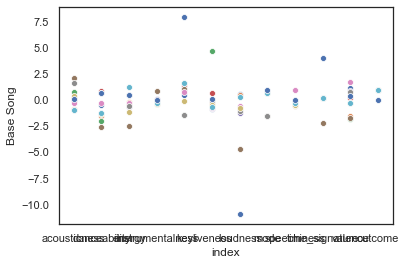

In [305]:
import seaborn as sns

scatter0 = sns.scatterplot(x='index', y='Recomendation 1', data =extendend_result_for_plot)
scatter1 = sns.scatterplot(x='index', y='Recomendation 2', data =extendend_result_for_plot)
scatter2 = sns.scatterplot(x='index', y='Recomendation 3', data =extendend_result_for_plot)
scatter3 = sns.scatterplot(x='index', y='Recomendation 4', data =extendend_result_for_plot)
scatter4 = sns.scatterplot(x='index', y='Recomendation 5', data =extendend_result_for_plot)
scatter5 = sns.scatterplot(x='index', y='Recomendation 6', data =extendend_result_for_plot)
scatter6 = sns.scatterplot(x='index', y='Recomendation 7', data =extendend_result_for_plot)
scatter7 = sns.scatterplot(x='index', y='Recomendation 8', data =extendend_result_for_plot)
scatter8 = sns.scatterplot(x='index', y='Recomendation 9', data =extendend_result_for_plot)
scatter9 = sns.scatterplot(x='index', y='Recomendation 10', data =extendend_result_for_plot)
scatter10 = sns.scatterplot(x='index', y='Base Song', data =extendend_result_for_plot)



In [222]:
import seaborn as sns
sns.set(style="white")
# x = extendend_result.index.to_list()
# y1 = extendend_result.iloc[:,1]
# # y2 = extendend_result.iloc[0,:-1]
# # y3 = extendend_result.iloc[1,:-1]
# # y4 = extendend_result.iloc[2,:-1]
# # y5 = extendend_result.iloc[3,:-1]
# # y6 = extendend_result.iloc[4,:-1]
# # y7 = extendend_result.iloc[5,:-1]
# # y8 = extendend_result.iloc[6,:-1]
# # y9 = extendend_result.iloc[7,:-1]
# # y10 = extendend_result.iloc[8,:-1]
# # y11 = extendend_result.iloc[9,:-1]

sns.relplot(x, y1)



TypeError: object of type 'NoneType' has no len()

In [223]:
mpg = sns.load_dataset("mpg")
m

0    -0.101649
1    -0.676199
2     1.013654
3    -1.740806
4     0.788340
5    -0.636769
6    -0.039688
7     0.698214
8     1.064349
9     0.320814
10   -3.244775
Name: danceability, dtype: float64

In [105]:
fig = go.Figure()

N = 100
random_x = np.linspace(0, 1, N)
random_y0 = np.random.randn(N) + 5
random_y1 = np.random.randn(N)
random_y2 = np.random.randn(N) - 5

# Add traces
fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[10,:],
                    mode='markers',
                    name='Actual fav'))

fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[0,:],
                    mode='markers',
                    name='Recomendation 1'))

fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[1,:],
                    mode='markers',
                    name='Recomendation 2'))

fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[2,:],
                    mode='markers',
                    name='Recomendation 3'))

fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[3,:],
                    mode='markers',
                    name='Recomendation 4'))

fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[4,:],
                    mode='markers',
                    name='Recomendation 5'))

fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[5,:],
                    mode='markers',
                    name='Recomendation 6'))

fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[6,:],
                    mode='markers',
                    name='Recomendation 7'))
              
fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[7,:],
                    mode='markers',
                    name='Recomendation 8'))
              
fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[6,:],
                    mode='markers',
                    name='Recomendation 9'))
              
fig.add_trace(go.Scatter(x=['acousticness','danceability','energy','instrumentalness',
                      'key', 'liveness', 'loudness','mode','speechiness', 'tempo',
                      'time_signature','valence'], y=extendend_result.iloc[7,:],
                    mode='markers',
                    name='Recomendation 10'))

ply.plot(fig, filename='features', validate=True)

'features.html'